** Question : can we Predict what the donation amount is by using the factors in the donars Data **

In [4]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

# Load international online transactions data from CSV
df = pd.read_csv('C:\\Users\\User\\Desktop\\donors_data.csv')

#Data Exploration
df.shape

#Drop first 2 Rows
df.drop(['Row Id'], axis=1, inplace = True)
df.drop(['Row Id.'], axis=1, inplace = True)
# First 10 rows of data
df.head(10)

Print function ready to serve.


,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,0,1,0,0,1,1,5,1,9,1399,637,703,1,74,102.0,6.0,5.0,29,3,4.857143,1,5.0
1,1,0,0,0,1,1,1,0,7,698,422,463,4,46,94.0,12.0,12.0,34,6,9.400000,1,10.0
2,0,0,0,1,0,2,5,1,8,828,358,376,13,32,30.0,10.0,5.0,29,7,4.285714,1,5.0
3,0,0,0,1,1,1,3,0,4,1471,484,546,4,94,177.0,10.0,8.0,30,3,7.080000,0,0.0
4,0,1,0,0,1,1,4,0,8,547,386,432,7,20,23.0,11.0,11.0,30,6,7.666667,0,0.0
5,0,1,0,0,1,1,4,1,8,482,242,275,28,38,73.0,10.0,10.0,31,3,7.300000,1,8.0
6,0,0,0,1,1,1,4,1,8,857,450,498,5,47,139.0,20.0,20.0,37,3,10.692308,1,10.0
7,1,0,0,0,1,1,1,0,7,1355,411,497,9,77,249.0,15.0,7.0,35,3,9.576923,1,20.0
8,0,0,1,0,1,1,4,0,5,505,333,388,16,51,63.0,15.0,10.0,37,8,9.000000,1,5.0
9,1,0,0,0,1,1,4,1,8,1438,458,533,8,21,26.0,16.0,16.0,30,6,13.000000,0,0.0


** Data Cleaning **

In [5]:
df.isnull().sum() # check Nulls

zipconvert_2       0
zipconvert_3       0
zipconvert_4       0
zipconvert_5       0
homeowner dummy    0
NUMCHLD            0
INCOME             0
gender dummy       0
WEALTH             0
HV                 0
Icmed              0
Icavg              0
IC15               0
NUMPROM            0
RAMNTALL           0
MAXRAMNT           0
LASTGIFT           0
totalmonths        0
TIMELAG            0
AVGGIFT            0
TARGET_B           0
TARGET_D           0
dtype: int64

** Eliminating Nulls **

In [6]:
"""# Finding all the columsn who have at least 10% of values as null
null_col_list = train.columns[train.isnull().sum() > 146].tolist()

print(null_col_list)train = train.drop(null_col_list, 1)

print('Number of Cols:', len(train.columns))"""

"# Finding all the columsn who have at least 10% of values as null\nnull_col_list = train.columns[train.isnull().sum() > 146].tolist()\n\nprint(null_col_list)train = train.drop(null_col_list, 1)\n\nprint('Number of Cols:', len(train.columns))"

In [7]:
df.dtypes

zipconvert_2         int64
zipconvert_3         int64
zipconvert_4         int64
zipconvert_5         int64
homeowner dummy      int64
NUMCHLD              int64
INCOME               int64
gender dummy         int64
WEALTH               int64
HV                   int64
Icmed                int64
Icavg                int64
IC15                 int64
NUMPROM              int64
RAMNTALL           float64
MAXRAMNT           float64
LASTGIFT           float64
totalmonths          int64
TIMELAG              int64
AVGGIFT            float64
TARGET_B             int64
TARGET_D           float64
dtype: object

In [8]:
df.describe()

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.00000,3120.000000
mean,0.214423,0.185256,0.214423,0.384615,0.770192,1.069231,3.893910,0.609295,6.402244,1141.361859,388.217308,432.088141,14.702885,49.089423,110.399875,16.651397,13.522917,31.136859,6.861859,10.690713,0.50000,6.499612
std,0.410487,0.388568,0.410487,0.486582,0.420777,0.347688,1.636186,0.487987,2.539978,946.642162,172.815950,168.195104,12.079882,22.717130,147.299933,22.223521,10.581439,4.132952,5.561209,7.443980,0.50008,10.597849
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,15.000000,5.000000,0.000000,17.000000,0.000000,2.138889,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,5.000000,556.000000,278.000000,318.000000,5.000000,29.000000,45.000000,10.000000,7.000000,29.000000,3.000000,6.356092,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000,1.000000,8.000000,822.000000,356.000000,396.000000,12.000000,48.000000,81.000000,15.000000,10.000000,31.000000,5.000000,9.000000,0.50000,0.500000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,21.000000,65.000000,134.625000,20.000000,16.000000,34.000000,9.000000,12.811652,1.00000,10.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7.000000,1.000000,9.000000,5945.000000,1500.000000,1331.000000,90.000000,157.000000,5674.900000,1000.000000,219.000000,37.000000,77.000000,122.166667,1.00000,200.000000


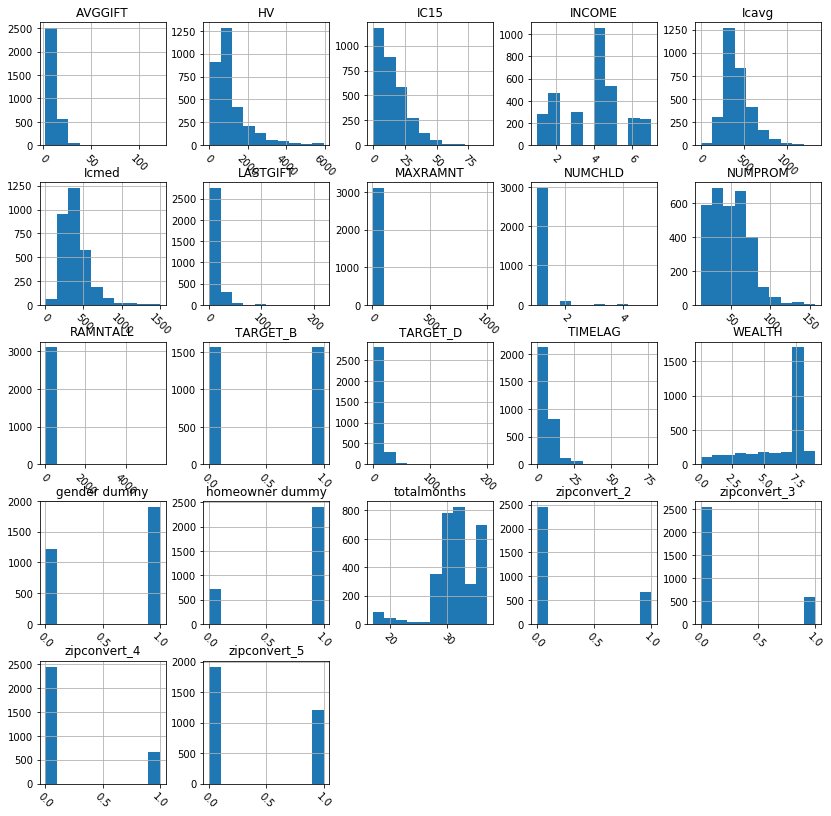

In [9]:
# Plot histogram grid
df.hist(figsize=(14,14), xrot=-45)

# Clear the text "residue"
plt.show()

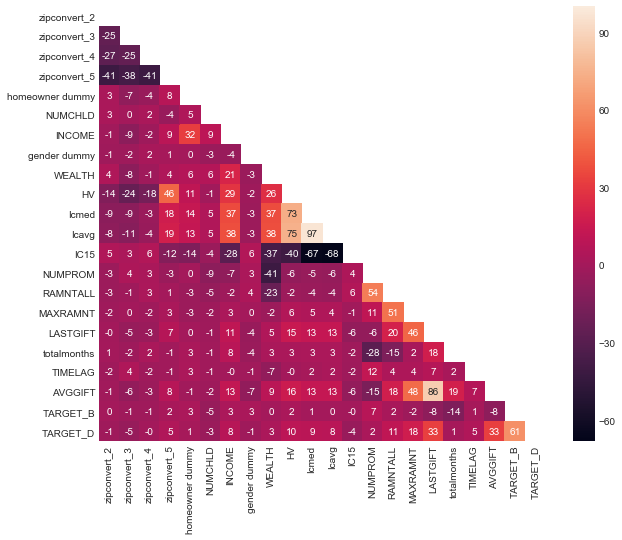

In [10]:
correlations = df.corr()
# Change color scheme
sns.set_style("white")

# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

#Mask
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Plot heatmap of correlations, masked top right, and remove cross correlations
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask)

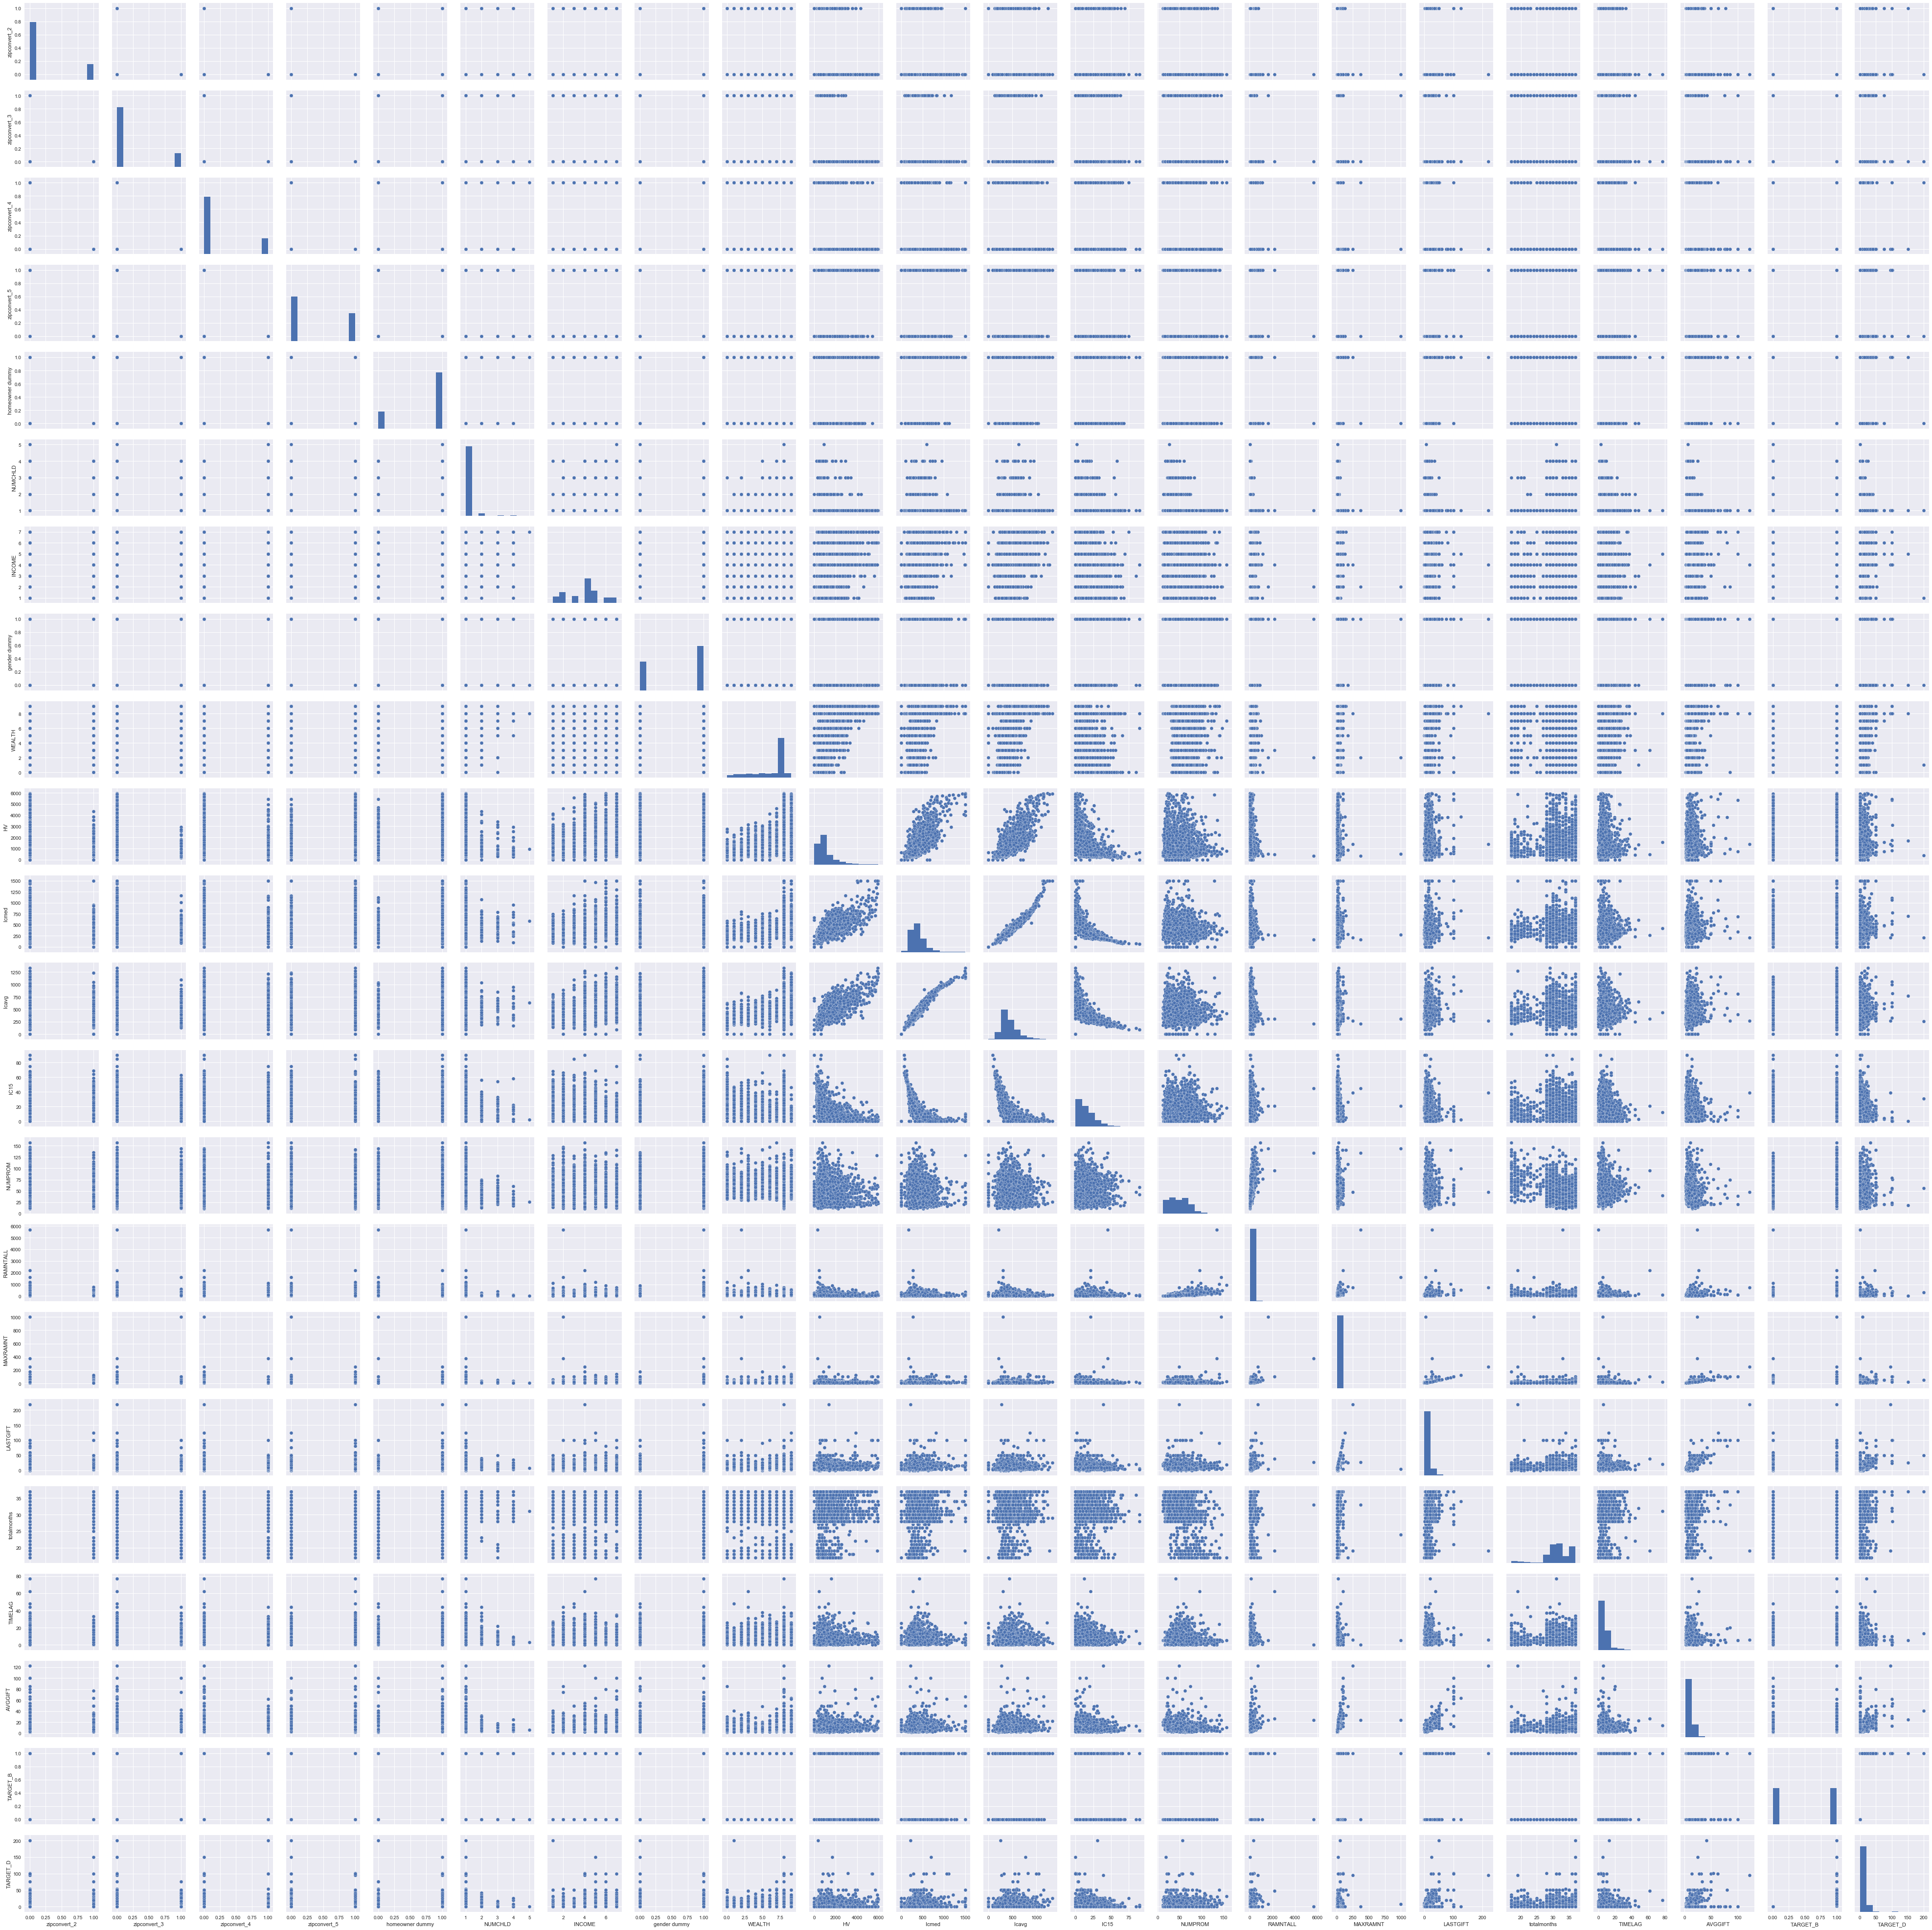

In [11]:
sns.set()
sns.pairplot(df)
plt.show()

** Group By Wealth or Income **

In [22]:
WealthGroup = df.groupby(["WEALTH"]).mean()
##WealthGroup["WEALTH"].describe()
WealthGroup

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
WEALTH,,,,,,,,,,,,,,,,,,,,,
0,0.125000,0.267857,0.214286,0.392857,0.687500,1.017857,3.080357,0.767857,661.375000,222.285714,270.883929,33.625000,67.526786,164.256161,15.642857,12.464286,30.500000,6.901786,9.365009,0.482143,5.401786
1,0.159420,0.268116,0.210145,0.355072,0.702899,1.021739,2.992754,0.615942,673.673913,260.144928,304.195652,24.717391,63.239130,144.959203,15.304348,11.775362,31.079710,6.956522,9.318593,0.543478,7.123188
2,0.181159,0.253623,0.268116,0.289855,0.746377,1.065217,3.550725,0.666667,709.840580,293.130435,334.318841,21.768116,62.000000,193.557464,25.869565,13.355072,30.746377,7.007246,10.123494,0.492754,5.282609
3,0.277778,0.216049,0.191358,0.314815,0.728395,1.037037,3.493827,0.592593,817.709877,308.222222,353.185185,18.709877,64.839506,173.132716,16.725309,13.098765,31.259259,8.438272,9.986135,0.481481,5.975309
4,0.228758,0.189542,0.209150,0.372549,0.758170,1.019608,3.372549,0.575163,854.405229,330.830065,374.424837,14.405229,61.679739,151.223856,16.787582,13.872549,31.601307,7.732026,9.869904,0.483660,6.013072
5,0.166667,0.193548,0.247312,0.392473,0.752688,1.043011,3.833333,0.580645,1006.327957,353.833333,396.456989,14.956989,63.811828,152.532473,15.403226,11.634409,30.473118,7.973118,8.996232,0.462366,5.338710
6,0.185185,0.203704,0.216049,0.395062,0.771605,1.080247,3.876543,0.543210,1076.487654,388.617284,433.617284,11.506173,63.858025,155.633272,16.960432,13.716049,31.197531,7.820988,9.932152,0.537037,7.018519
7,0.205556,0.183333,0.261111,0.350000,0.850000,1.038889,4.072222,0.577778,1206.433333,427.038889,466.761111,9.033333,63.905556,161.165833,18.072222,14.994444,31.016667,7.872222,11.327339,0.550000,8.188167
8,0.225294,0.167647,0.202941,0.402941,0.768824,1.088235,3.995294,0.611765,1213.241765,401.598235,446.403529,13.661176,36.974118,68.755647,15.511041,13.372353,31.261176,6.134118,11.068022,0.493529,6.296424


In [18]:
IncomeGroup = df.groupby(["INCOME"]).mean()
#IncomeGroup["INCOME"].describe()
IncomeGroup

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
INCOME,,,,,,,,,,,,,,,,,,,,,
1,0.209220,0.237589,0.255319,0.294326,0.404255,1.014184,0.620567,5.726950,845.198582,313.301418,358.138298,20.358156,52.226950,110.853794,14.542553,12.127660,30.581560,6.872340,9.508049,0.457447,5.702128
2,0.207265,0.250000,0.222222,0.318376,0.566239,1.053419,0.636752,5.613248,814.226496,316.474359,359.491453,18.553419,51.416667,124.870064,17.885684,12.561966,30.797009,6.634615,9.845202,0.478632,5.183312
3,0.222973,0.209459,0.219595,0.347973,0.645270,1.077703,0.581081,6.280405,938.000000,351.189189,395.047297,16.493243,49.841216,100.303209,15.097973,12.685811,30.722973,7.030405,9.851968,0.510135,5.472973
4,0.216524,0.165242,0.198481,0.417854,0.930674,1.041785,0.637227,6.314340,1122.822412,374.622032,418.970560,14.900285,48.794872,110.554843,16.142707,13.111111,31.192783,6.943020,10.542510,0.497626,6.436847
5,0.241121,0.170093,0.216822,0.371963,0.796262,1.091589,0.596262,6.850467,1151.138318,414.020561,457.985047,12.379439,47.392523,104.483252,16.469159,13.868224,31.357009,7.087850,10.972647,0.530841,7.565421


In [19]:
Avggift = df.groupby(["AVGGIFT"]).mean()
#IncomeGroup["INCOME"].describe()
Avggift

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,TARGET_B,TARGET_D
AVGGIFT,,,,,,,,,,,,,,,,,,,,,
2.138889,0.000000,0.00,0.000000,1.000000,0.000000,1.0,2.000000,1.000000,0.000000,1423.000000,240.000000,212.000000,30.0,62.00,77.000000,5.00,5.0,31.000000,6.000000,0.000000,0.000000
2.260870,0.000000,1.00,0.000000,0.000000,1.000000,1.0,3.000000,1.000000,8.000000,296.000000,280.000000,315.000000,17.0,64.00,52.000000,5.00,2.0,20.000000,7.000000,1.000000,2.000000
2.354839,0.000000,1.00,0.000000,0.000000,1.000000,1.0,6.000000,1.000000,2.000000,594.000000,354.000000,381.000000,11.0,58.00,73.000000,5.00,5.0,34.000000,1.000000,0.000000,0.000000
2.439815,1.000000,0.00,0.000000,0.000000,1.000000,1.0,5.000000,1.000000,4.000000,608.000000,301.000000,326.000000,18.0,76.00,131.750000,5.00,3.0,30.000000,5.000000,1.000000,2.000000
2.445946,0.000000,0.00,1.000000,0.000000,0.000000,1.0,1.000000,1.000000,2.000000,247.000000,241.000000,251.000000,31.0,67.00,90.500000,5.00,5.0,30.000000,3.000000,1.000000,6.000000
2.463415,0.000000,0.00,0.000000,1.000000,1.000000,1.0,6.000000,0.000000,1.000000,569.000000,227.000000,285.000000,29.0,63.00,101.000000,5.00,2.0,30.000000,3.000000,1.000000,5.000000
2.520000,0.000000,0.00,0.000000,1.000000,1.000000,1.0,6.000000,1.000000,9.000000,1202.000000,592.000000,666.000000,1.0,48.00,63.000000,5.00,3.0,30.000000,1.000000,0.000000,0.000000
2.555556,1.000000,0.00,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,6.000000,724.000000,345.000000,382.000000,11.0,58.00,92.000000,5.00,2.0,33.000000,5.000000,0.000000,0.000000
2.583333,0.000000,0.00,1.000000,0.000000,1.000000,1.0,4.000000,0.000000,5.000000,805.000000,399.000000,461.000000,4.0,80.00,100.750000,5.00,3.0,28.000000,13.000000,1.000000,3.000000


** Sample Question Can we Predict how much Somebody will be a Donote**

**Regression Modeling **

In [51]:
df.dtypes

Row Id               int64
Row Id.              int64
zipconvert_2         int64
zipconvert_3         int64
zipconvert_4         int64
zipconvert_5         int64
homeowner dummy      int64
NUMCHLD              int64
INCOME               int64
gender dummy         int64
WEALTH               int64
HV                   int64
Icmed                int64
Icavg                int64
IC15                 int64
NUMPROM              int64
RAMNTALL           float64
MAXRAMNT           float64
LASTGIFT           float64
totalmonths          int64
TIMELAG              int64
AVGGIFT            float64
TARGET_B             int64
TARGET_D           float64
dtype: object

In [110]:
print('Total Features:', len(df.columns.values))
print('Total Records:', df.shape[0])

Total Features: 22
Total Records: 3120


In [113]:
# Non Numeric Column List
non_numeric_cols = df.select_dtypes(exclude=['number'])

non_numeric_cols.columns.values

array([], dtype=object)

In [114]:
#Covering Non-Numeric Columns
# Column Mapping
for col in non_numeric_cols:
    unique_vals = train[col].unique()
    
    col_dict = {}
    # Mapping the unique values with numeric value
    for i in range(0, len(unique_vals)):
        col_dict[unique_vals[i]] = i
        
    train[col] = train[col].map(col_dict).astype(int)

In [182]:
pd.options.display.max_rows = 4000
corr_list = corr['TARGET_D'].sort_values(ascending=False)[1:]
print(corr_list)

TARGET_B           0.613
LASTGIFT           0.329
AVGGIFT            0.327
MAXRAMNT           0.178
RAMNTALL           0.111
HV                 0.099
Icmed              0.089
Icavg              0.082
INCOME             0.080
zipconvert_5       0.050
TIMELAG            0.049
WEALTH             0.034
Row Id             0.022
Row Id.            0.022
NUMPROM            0.022
homeowner dummy    0.014
totalmonths        0.011
zipconvert_4      -0.002
zipconvert_2      -0.011
gender dummy      -0.012
NUMCHLD           -0.035
IC15              -0.040
zipconvert_3      -0.046
Name: TARGET_D, dtype: float64


In [152]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

#import Libraries
# Scikit-Learn for Modeling
import sklearn
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [153]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.18.1.


In [183]:
#SPlit Dataset for Train - Test
# Function for splitting training and test set
from sklearn.model_selection import train_test_split # Scikit-Learn 0.18+

# Create separate object for target variable
y = df.TARGET_D

# Create separate object for input features
X = df.drop('TARGET_D', axis=1)

In [184]:
# Split X and y into train and test sets
# test_size=0.2 to set aside 20% of obervations for test set
# pass random_state = 1234 to set the randoms tate of replicable results
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123)
print( len(X_train), len(X_test), len(y_train), len(y_test) )

2496 624 2496 624


## Build Pipeline
- Need to Standarize my featurs to the same scale by subtracting means and dividing by StdDevs
- This is important because regression algorithms will overemphasize featurs that are on larger numerical scales
- This will "center around zero, with unit variance"

In [185]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()
# Summary statistics of X_train_new
X_train_new.describe()

,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B
count,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000,2496.000
mean,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.527,-0.480,-0.514,-0.790,-1.855,-0.196,-1.781,-1.246,-2.558,-1.207,-2.259,-2.577,-1.202,-1.629,-0.620,-0.820,-1.290,-3.391,-1.210,-1.185,-0.997
25%,-0.527,-0.480,-0.514,-0.790,0.539,-0.196,-0.557,-1.246,-0.571,-0.623,-0.637,-0.673,-0.789,-0.877,-0.422,-0.461,-0.623,-0.511,-0.681,-0.594,-0.997
50%,-0.527,-0.480,-0.514,-0.790,0.539,-0.196,0.055,0.803,0.621,-0.342,-0.178,-0.206,-0.212,-0.036,-0.190,-0.102,-0.243,-0.031,-0.328,-0.218,-0.997
75%,-0.527,-0.480,-0.514,1.265,0.539,-0.196,0.666,0.803,0.621,0.217,0.445,0.501,0.531,0.671,0.153,0.257,0.234,0.689,0.377,0.312,1.002
max,1.898,2.081,1.944,1.265,0.539,11.500,1.890,0.803,1.019,5.039,6.459,4.998,6.223,4.784,36.784,25.739,19.567,1.408,12.365,15.475,1.002


* The Means are all now centered around zero 0.0
* standard deviations are 1.0, De-varianced

* Tuning settings for cross-validation

Steps

1. splitinto 10 equal folds
2. preprocess 9 training folds, learning the preprocessing parameters
3. train your model on those newly preprossed 9 folds
4. preprocess the hold-out fold using the same preprocessing parameters form the traning folds
5. evaluate model on the new hold-out fold
6. repeat 2-5, 10 times 
7. average performance of 10 folds

In [186]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline
# For standardization
from sklearn.preprocessing import StandardScaler

In [187]:
# Create pipelines dictionary

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))
}

* add RandomForestRegressor and GradientBoostingRegressor
* set random_state=123 to ensure replicable results

In [188]:
# Add a pipeline for 'rf'
pipelines['rf'] = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))

# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [189]:
# Check that we have all 6 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

enet <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
lasso <class 'sklearn.pipeline.Pipeline'>


In [190]:
## Tune Parameters
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}
# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  
}
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}
# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [191]:
# Create hyperparameters dictionary to save learning
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [192]:
# check dictionary structure
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [193]:
##FIt and Tune Models
#import gridsearchcv : performs look to search for best combo of vlaues int he hyper paramter grid then create CV score
from sklearn.model_selection import GridSearchCV
# Create cross-validation object from Lasso pipeline and Lasso hyperparameters
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)
# Fit and tune model
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [194]:
#Create fitted models dictionary that have been tuned using CV
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

enet has been fitted.
gb has been fitted.
ridge has been fitted.
rf has been fitted.
lasso has been fitted.


In [195]:
# Check that we have 5 cross-validation objects
for key, value in fitted_models.items():
    print( key, type(value) )

enet <class 'sklearn.model_selection._search.GridSearchCV'>
lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>


In [196]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

enet has been fitted.
lasso has been fitted.
ridge has been fitted.
gb has been fitted.
rf has been fitted.


## Evaluate Models and Analyze Findings ##

* Check R^2 for each model, higher R^2 is better
* To evaluate we need to see how the performance was on the test data

In [197]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print( name, model.best_score_ )

enet 0.529909809021
lasso 0.532708415257
ridge 0.514525791528
gb 0.678383509272
rf 0.674245380459


In [198]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [199]:
# Display fitted random forest object
fitted_models['gb']

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingregressor', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, mi...        presort='auto', random_state=123, subsample=1.0, verbose=0,
             warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gradientboostingregressor__n_estimators': [100, 200], 'gradientboostingregressor__max_depth': [1, 3, 5], 'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [200]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [201]:
# Calculate and print R^2 and MAE
# first pass actual values to target variable
# second pass predicted values to target variable
print( 'R^2:', r2_score(y_test, pred ))
print( 'MAE:', mean_absolute_error(y_test, pred))

R^2: 0.748981882361
MAE: 2.05398205128


In [202]:
# Code here
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

enet
--------
R^2: 0.566425020784
MAE: 3.59922439199

lasso
--------
R^2: 0.569486086753
MAE: 3.6533917986

ridge
--------
R^2: 0.554495201757
MAE: 3.87969795068

gb
--------
R^2: 0.749430555016
MAE: 1.92719659321

rf
--------
R^2: 0.748981882361
MAE: 2.05398205128



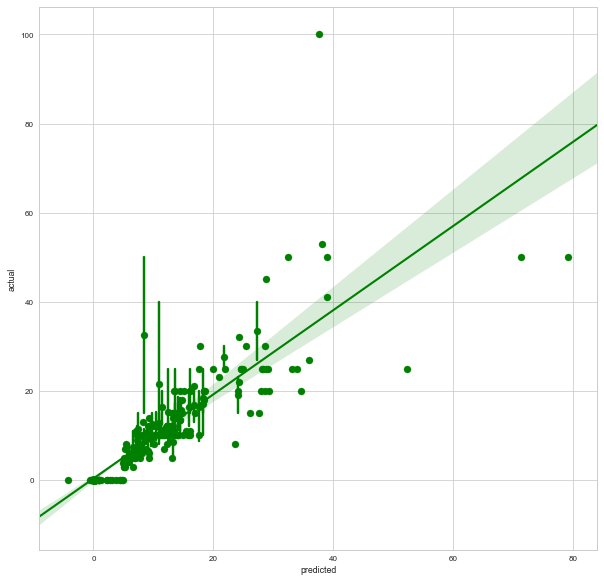

In [218]:
gb_pred = fitted_models['gb'].predict(X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=gb_pred, y=y_test, x_estimator=np.mean, color="g")
#plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [225]:
plot_learning_curve(gb_pred, title, X_train, y_train, cv=cv, n_jobs=n_jobs) 
plt.show() 

NameError: name 'plot_learning_curve' is not defined

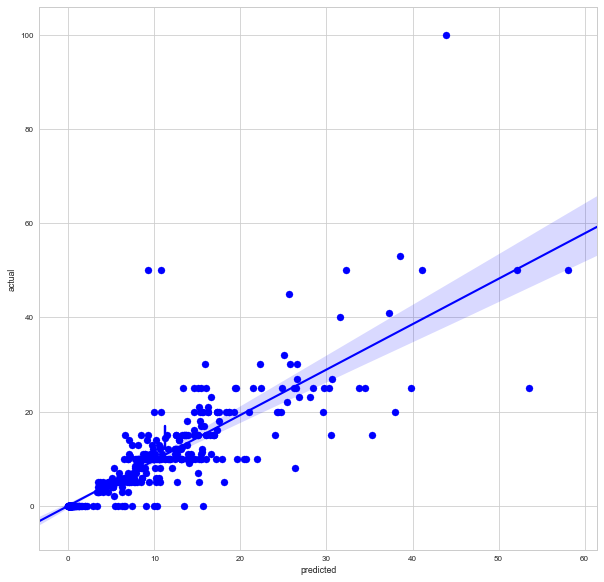

In [219]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=rf_pred, y=y_test, x_estimator=np.mean, color="b")
#plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

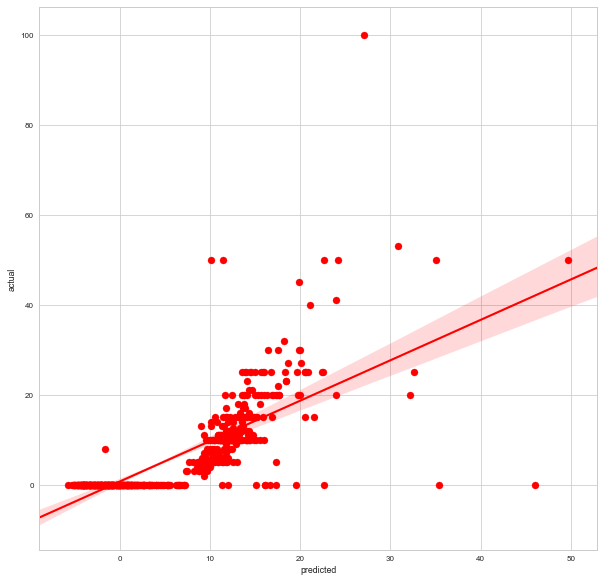

In [222]:
rd_pred = fitted_models['ridge'].predict(X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=rd_pred, y=y_test, x_estimator=np.mean, color="r")
#plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

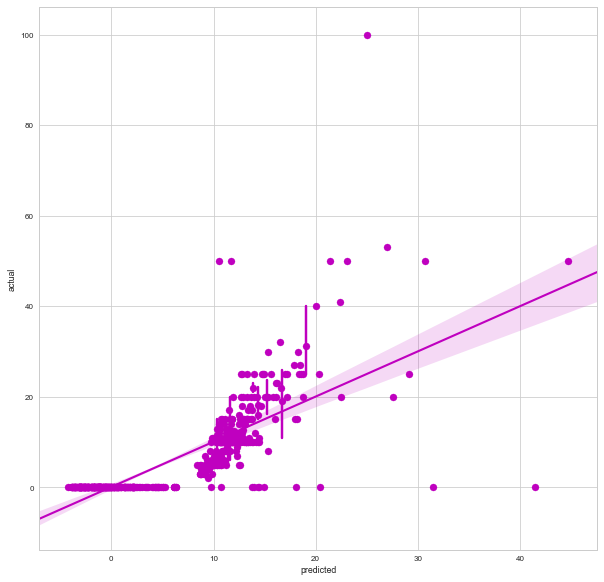

In [223]:
lass_pred = fitted_models['lasso'].predict(X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=lass_pred, y=y_test, x_estimator=np.mean, color="m")
#plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

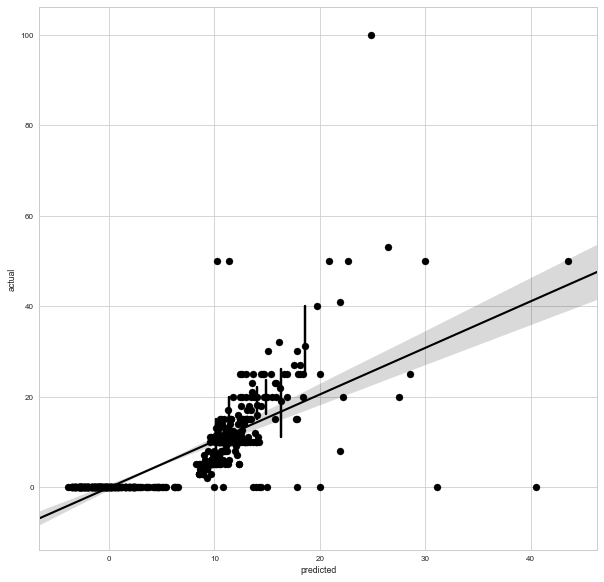

In [224]:
enet_pred = fitted_models['enet'].predict(X_test)
plt.figure(figsize=(10,10))
sns.regplot(x=enet_pred, y=y_test, x_estimator=np.mean, color="k")
#plt.scatter(gb_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [226]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [228]:
# Load data
boston = datasets.load_boston()
X, y = shuffle(X, df.TARGET_D, random_state=123)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

In [229]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 13.6484


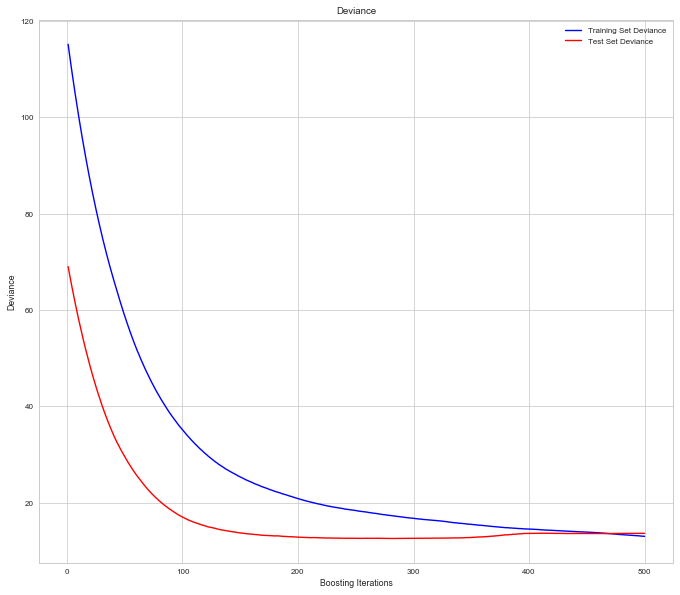

In [238]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

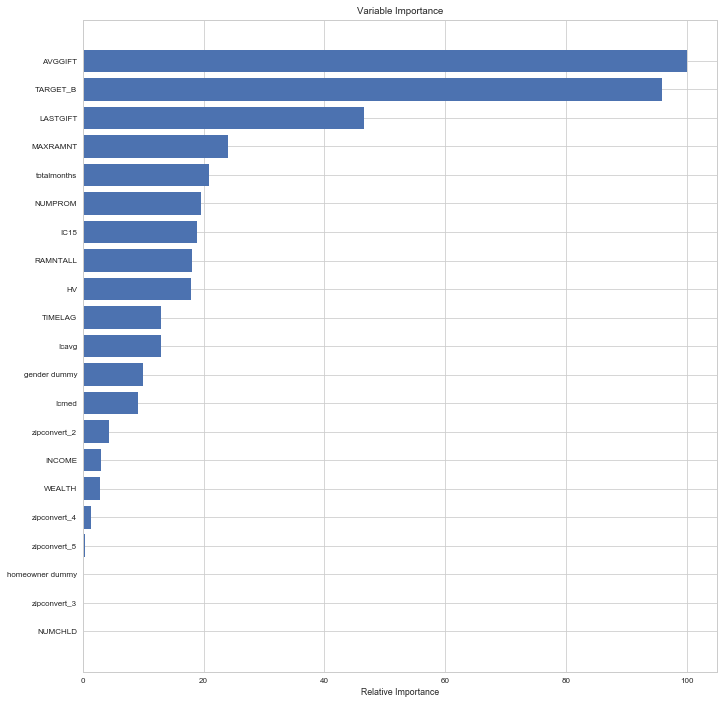

In [240]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(25, 12))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()